=== K-NEAREST NEIGHBORS  ===

Generating dataset...
Samples: 60  |  Features: 2

Splitting data...
Train: 48  |  Test: 12

Testing k values...
k=1: Accuracy=1.000
k=2: Accuracy=1.000
k=3: Accuracy=1.000
k=4: Accuracy=1.000
k=5: Accuracy=1.000
k=6: Accuracy=1.000
k=7: Accuracy=1.000
k=8: Accuracy=1.000
k=9: Accuracy=1.000
k=10: Accuracy=1.000

Best k: 1 | Accuracy: 1.000

Single sample prediction:
Sample: [3.7 1.9] -> Predicted Class: 1

Creating plots...


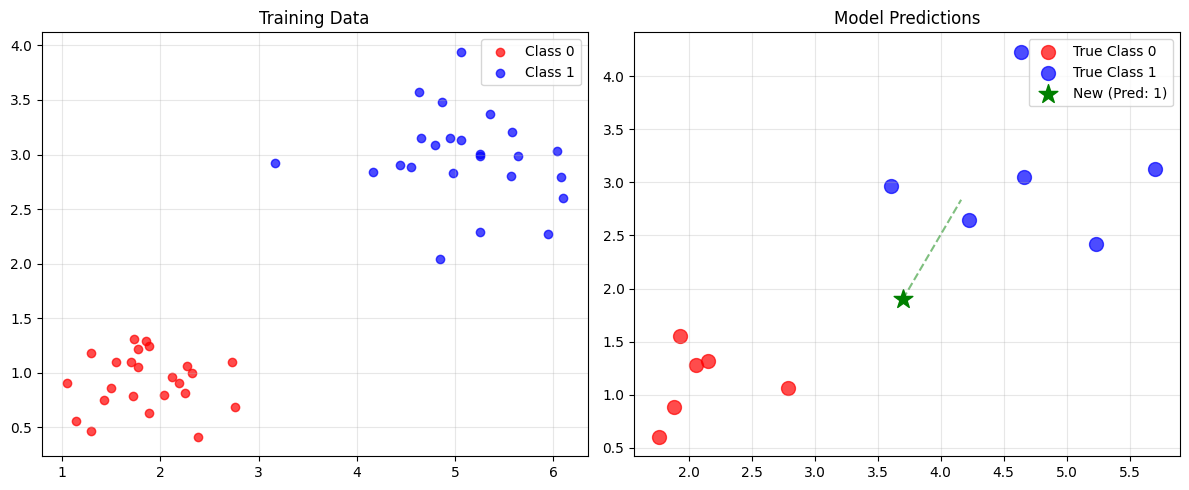


=== SUMMARY ===
Algorithm: KNN
Optimal k: 1
Final Accuracy: 1.000
Errors: 0/12


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

class KNNClassifier:
    def __init__(self, k=3):
        self.k_value = k
        self.train_data = None
        self.train_labels = None

    def train(self, data, labels):
        self.train_data = np.array(data)
        self.train_labels = np.array(labels)

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def predict_single(self, sample):
        d_list = []
        for i, p in enumerate(self.train_data):
            dist = self.euclidean_distance(sample, p)
            d_list.append((dist, self.train_labels[i]))

        d_list.sort(key=lambda x: x[0])
        nearest = d_list[:self.k_value]
        votes = Counter([label for _, label in nearest])
        pred = votes.most_common(1)[0][0]

        return pred, nearest

    def predict(self, samples):
        results = []
        for s in samples:
            r, _ = self.predict_single(s)
            results.append(r)
        return np.array(results)

    def accuracy(self, x_test, y_test):
        preds = self.predict(x_test)
        return np.sum(preds == y_test) / len(y_test)

def sample_data_generation():
    np.random.seed(42)
    set1_x = np.random.normal(2, 0.5, 30)
    set1_y = np.random.normal(1, 0.3, 30)
    group1 = np.column_stack((set1_x, set1_y))
    labels1 = np.zeros(30)

    set2_x = np.random.normal(5, 0.7, 30)
    set2_y = np.random.normal(3, 0.5, 30)
    group2 = np.column_stack((set2_x, set2_y))
    labels2 = np.ones(30)

    data = np.vstack((group1, group2))
    labels = np.hstack((labels1, labels2))
    return data, labels

def split_data(data, labels, ratio=0.8):
    idx = list(range(len(data)))
    random.shuffle(idx)

    cut = int(len(data) * ratio)
    idx_train = idx[:cut]
    idx_test = idx[cut:]

    return data[idx_train], data[idx_test], labels[idx_train], labels[idx_test]

def plot_results(x_train, y_train, x_test, y_test, predictions, model, new_point=None):
    plt.figure(figsize=(12, 5))
    col = ['red', 'blue']

    plt.subplot(1, 2, 1)
    for c in range(2):
        mask = y_train == c
        plt.scatter(x_train[mask, 0], x_train[mask, 1], c=col[c], alpha=0.7, label=f'Class {c}')
    plt.title('Training Data')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.subplot(1, 2, 2)
    for c in range(2):
        mask = y_test == c
        plt.scatter(x_test[mask, 0], x_test[mask, 1], c=col[c], alpha=0.7, label=f'True Class {c}', s=100)

    wrong = predictions != y_test
    if np.any(wrong):
        plt.scatter(x_test[wrong, 0], x_test[wrong, 1], c='black', marker='x', s=100, label='Incorrect')

    if new_point is not None:
        pred, neigh = model.predict_single(new_point)
        plt.scatter(new_point[0], new_point[1], c='green', marker='*', s=200, label=f'New (Pred: {int(pred)})')

        for dist, lbl in neigh:
            for j, p in enumerate(model.train_data):
                if model.euclidean_distance(new_point, p) == dist and model.train_labels[j] == lbl:
                    plt.plot([new_point[0], p[0]], [new_point[1], p[1]], 'g--', alpha=0.5)
                    break

    plt.title('Model Predictions')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def full_demo():
    print("=== K-NEAREST NEIGHBORS  ===\n")

    print("Generating dataset...")
    X, y = sample_data_generation()
    print(f"Samples: {len(X)}  |  Features: {X.shape[1]}")

    print("\nSplitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)
    print(f"Train: {len(X_train)}  |  Test: {len(X_test)}")

    print("\nTesting k values...")
    results = []
    for k in range(1, 11):
        model = KNNClassifier(k=k)
        model.train(X_train, y_train)
        acc = model.accuracy(X_test, y_test)
        results.append((k, acc))
        print(f"k={k}: Accuracy={acc:.3f}")

    best = max(results, key=lambda x: x[1])
    print(f"\nBest k: {best[0]} | Accuracy: {best[1]:.3f}")

    final = KNNClassifier(best[0])
    final.train(X_train, y_train)
    preds = final.predict(X_test)

    print("\nSingle sample prediction:")
    sample = np.array([3.7, 1.9])
    pred, neigh = final.predict_single(sample)
    print(f"Sample: {sample} -> Predicted Class: {int(pred)}")

    print("\nCreating plots...")
    plot_results(X_train, y_train, X_test, y_test, preds, final, sample)

    print("\n=== SUMMARY ===")
    print(f"Algorithm: KNN")
    print(f"Optimal k: {best[0]}")
    print(f"Final Accuracy: {best[1]:.3f}")
    print(f"Errors: {np.sum(preds != y_test)}/{len(y_test)}")

if __name__ == "__main__":
    full_demo()
